In [2]:
import pandas as pd
from sqlalchemy import create_engine
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import pyplot
import random
import statsmodels.api as sm
import scipy.stats as stats
from fitter import Fitter

In [3]:
#db params

db_username_0 = 'postgres'
db_password_0 = 'Simulation2024'
db_host_0 = 'localhost'
db_port_0 = '5432'
db_name_0 = 'simulationdatainit'
table_name_0 = 'simulationsagg4'

In [4]:
#Creating connection and extracting data

connection_string = f"postgresql://{db_username_0}:{db_password_0}@{db_host_0}:{db_port_0}/{db_name_0}"
engine = create_engine(connection_string)
query = f"SELECT * FROM {table_name_0}"
df_0 = pd.read_sql(query, engine)

In [5]:
df_0.head()

,individual_run_id,epsilon,n_zero_square,reversal_count,average_reversal_time,reversal_times,reversal_durations,positive_values,negative_values
0,1,0.152642,596.36,18,111.118684,"[22.708000000000002, 176.794, 188.654, 228.528...","[22.708000000000002, 154.086, 11.8599999999999...",809812,1190188
1,2,0.152642,596.36,11,173.582333,"[104.665, 273.377, 323.64, 627.923, 826.485, 9...","[104.665, 168.712, 50.26299999999998, 304.283,...",956619,1043381
2,3,0.152642,596.36,16,122.044941,"[11.997, 105.0, 236.756, 412.651, 816.535, 876...","[11.997, 93.003, 131.756, 175.895, 403.8839999...",1197437,802563
3,4,0.152642,596.36,15,127.021812,"[178.076, 273.814, 371.882, 379.104, 672.871, ...","[178.076, 95.73800000000003, 98.06799999999998...",1285406,714594
4,5,0.152642,596.36,10,191.182636,"[19.189, 280.36400000000003, 376.455, 757.865,...","[19.189, 261.175, 96.09099999999995, 381.41, 3...",831082,1168918


In [6]:
len(df_0)

15000

In [7]:
unique_combos = df_0.drop_duplicates(subset=['epsilon', 'n_zero_square'])
unique_combos = unique_combos[['epsilon', 'n_zero_square']]
unique_combos.reset_index(drop=True, inplace=True)
unique_combos

,epsilon,n_zero_square
0,0.152642,596.360000
1,0.237142,944.933951
2,0.123943,318.864022
3,0.196791,691.477740
4,0.101057,226.553750
5,0.066420,112.202062


In [8]:
df_0 = df_0[(df_0['epsilon'] != 0.237141981129506) & (df_0['n_zero_square'] != 944.933950781621)]
df_0 = df_0[(df_0['epsilon'] != 0.10105697229623531) & (df_0['n_zero_square'] != 226.55375007277567)]
df_0 = df_0[(df_0['epsilon'] != .06641994156659121) & (df_0['n_zero_square'] != 112.2020615473713)]

In [9]:
unique_combos = df_0.drop_duplicates(subset=['epsilon', 'n_zero_square'])
unique_combos = unique_combos[['epsilon', 'n_zero_square']]
unique_combos.reset_index(drop=True, inplace=True)
unique_combos

,epsilon,n_zero_square
0,0.152642,596.360000
1,0.123943,318.864022
2,0.196791,691.477740


In [10]:
#Defining common filter functions

def any_values_less_than_5(duration_list):
    return any(value < 5 for value in duration_list)

def sum_values_less_than_5(duration_list):
    return sum(value < 5 for value in duration_list)

def update_reversal_durations(df, simulation_end):
    for index, row in df.iterrows():
        full_range = [0] + row['reversal_times'] + [simulation_end]
        durations = [round(full_range[i + 1] - full_range[i], 2) for i in range(len(row['reversal_times']) + 1)]
        df.at[index, 'reversal_durations'] = durations
    return df

def calculate_average_reversal_time_excluding_last(reversal_durations):
    average_reversal_time = np.mean(reversal_durations[:-1])
    return average_reversal_time

def calculate_average_reversal_time(reversal_durations):
    average_reversal_time = np.mean(reversal_durations)
    return average_reversal_time

In [11]:
#Changing df_0 into cleaned_df_0

df_0 = df_0[(df_0['reversal_count'] > 0)]
df_0[((df_0['positive_values'] + df_0['negative_values']) > 2000000)]
df_0 = update_reversal_durations(df_0, 2000)
df_0['average_reversal_time'] = df_0['reversal_durations'].apply(calculate_average_reversal_time)
df_0['average_reversal_time_excluding_last'] = df_0['reversal_durations'].apply(calculate_average_reversal_time_excluding_last)

df_0_AnyLessThan5 = df_0['reversal_durations'].apply(any_values_less_than_5)
df_0['any_less_than_5'] = df_0_AnyLessThan5
df_0[(df_0['any_less_than_5'] == True)].head()
df_0_cleaned = df_0
df_0_cleaned.head()

,individual_run_id,epsilon,n_zero_square,reversal_count,average_reversal_time,reversal_times,reversal_durations,positive_values,negative_values,average_reversal_time_excluding_last,any_less_than_5
0,1,0.152642,596.36,18,105.263158,"[22.708000000000002, 176.794, 188.654, 228.528...","[22.71, 154.09, 11.86, 39.87, 203.38, 98.21, 1...",809812,1190188,104.930556,False
1,2,0.152642,596.36,11,166.666667,"[104.665, 273.377, 323.64, 627.923, 826.485, 9...","[104.67, 168.71, 50.26, 304.28, 198.56, 117.39...",956619,1043381,174.273636,False
2,3,0.152642,596.36,16,117.647059,"[11.997, 105.0, 236.756, 412.651, 816.535, 876...","[12.0, 93.0, 131.76, 175.9, 403.88, 59.63, 55....",1197437,802563,120.327500,False
3,4,0.152642,596.36,15,125.000000,"[178.076, 273.814, 371.882, 379.104, 672.871, ...","[178.08, 95.74, 98.07, 7.22, 293.77, 34.54, 11...",1285406,714594,131.176667,False
4,5,0.152642,596.36,10,181.819091,"[19.189, 280.36400000000003, 376.455, 757.865,...","[19.19, 261.18, 96.09, 381.41, 361.49, 300.39,...",831082,1168918,189.700000,False


In [12]:
len(df_0_cleaned)

7500

In [13]:
df_1 = df_0_cleaned[(df_0_cleaned['epsilon'] == 0.1526418) & (df_0_cleaned['n_zero_square'] == 596.36)]
df_2 = df_0_cleaned[(df_0_cleaned['epsilon'] == 0.12394270273516) & (df_0_cleaned['n_zero_square'] == 318.864021731039)]
df_3 = df_0_cleaned[(df_0_cleaned['epsilon'] == .1967910497548276) & (df_0_cleaned['n_zero_square'] == 691.4777400853942)]


In [14]:
len(df_1)

2500

In [15]:
len(df_2)

2500

In [16]:
len(df_3)

2500

In [17]:
hist_data_1 = [item for sublist in df_1.apply(lambda row: row['reversal_durations'][:-1], axis = 1) for item in sublist]
len(hist_data_1)

32372

In [18]:
hist_data_2 = [item for sublist in df_2.apply(lambda row: row['reversal_durations'][:-1], axis = 1) for item in sublist]
len(hist_data_2) 

74493

In [19]:
hist_data_3 = [item for sublist in df_3.apply(lambda row: row['reversal_durations'][:-1], axis = 1) for item in sublist]
len(hist_data_3)

65144

In [20]:
data = hist_data_1


2024-06-04 14:40:02.075 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted norm distribution with error=6.3e-05)
2024-06-04 14:40:02.185 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted expon distribution with error=2e-06)
2024-06-04 14:40:03.003 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted lognorm distribution with error=0.000153)
2024-06-04 14:40:04.158 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted gamma distribution with error=1e-06)


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
gamma,6.722280e-07,2103.222768,2128.377916,inf,0.012439,8.843040e-05
expon,2.395182e-06,2047.096921,2063.867019,inf,0.024783,1.050202e-17
norm,6.322167e-05,4132.991102,4149.761200,inf,0.148924,0.000000e+00
lognorm,1.533433e-04,1980.972073,2006.127221,inf,0.675598,0.000000e+00


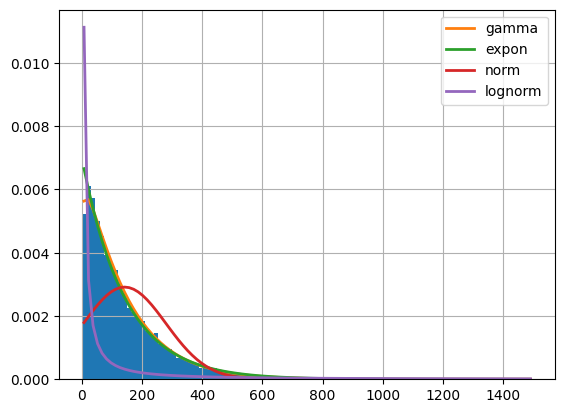

In [21]:

f = Fitter(data, distributions=['norm', 'expon', 'gamma', 'lognorm'])
fitted_results = f.fit()

# Print the summary of the best fit
f.summary()


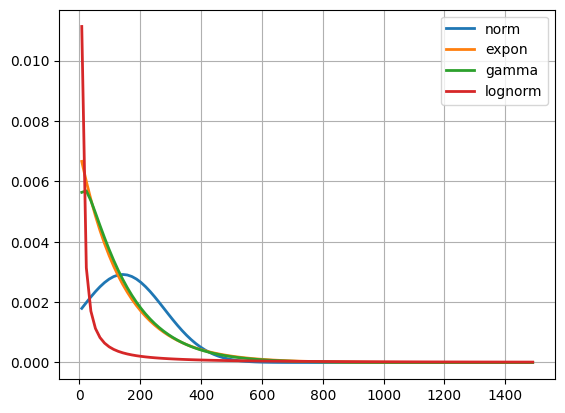

In [22]:
f.plot_pdf(names=['norm', 'expon', 'gamma', 'lognorm'])
plt.show()

In [23]:
data = hist_data_2


2024-06-04 14:40:05.547 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted norm distribution with error=0.000265)
2024-06-04 14:40:05.562 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted expon distribution with error=0.000124)
2024-06-04 14:40:09.210 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted lognorm distribution with error=1.2e-05)
2024-06-04 14:40:09.737 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted gamma distribution with error=3.2e-05)


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
lognorm,0.000012,1833.662212,1861.317593,inf,0.025076,3.997847e-41
gamma,0.000032,2226.043283,2253.698665,inf,0.034060,1.622904e-75
expon,0.000124,1971.249346,1989.686267,inf,0.087587,0.000000e+00
norm,0.000265,4972.851814,4991.288735,inf,0.143518,0.000000e+00


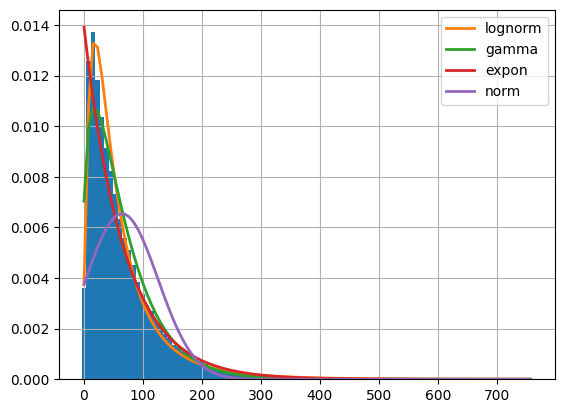

In [24]:

f = Fitter(data, distributions=['norm', 'expon', 'gamma', 'lognorm'])
f.fit()

# Print the summary of the best fit
f.summary()


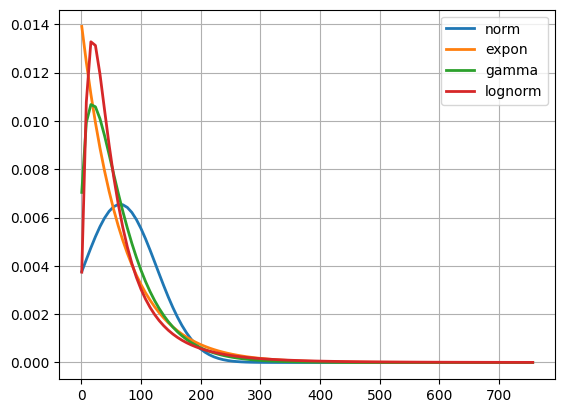

In [25]:
f.plot_pdf(names=['norm', 'expon', 'gamma', 'lognorm'])
plt.show()

In [26]:
data = hist_data_3


2024-06-04 14:40:11.238 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted norm distribution with error=0.000185)
2024-06-04 14:40:11.249 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted expon distribution with error=9e-05)
2024-06-04 14:40:13.145 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted lognorm distribution with error=8e-06)
2024-06-04 14:40:13.976 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted gamma distribution with error=2.6e-05)


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
lognorm,0.000008,1931.980757,1959.233823,inf,0.024548,1.560360e-34
gamma,0.000026,2454.422411,2481.675478,inf,0.037876,1.228475e-81
expon,0.000090,2135.083497,2153.252208,inf,0.092016,0.000000e+00
norm,0.000185,6182.846217,6201.014928,inf,0.146906,0.000000e+00


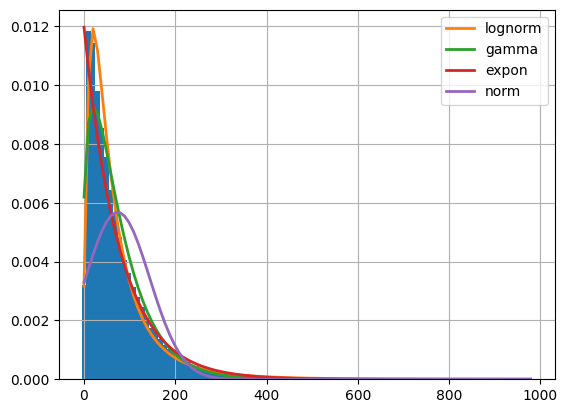

In [27]:

f = Fitter(data, distributions=['norm', 'expon', 'gamma', 'lognorm'])
f.fit()

# Print the summary of the best fit
f.summary()


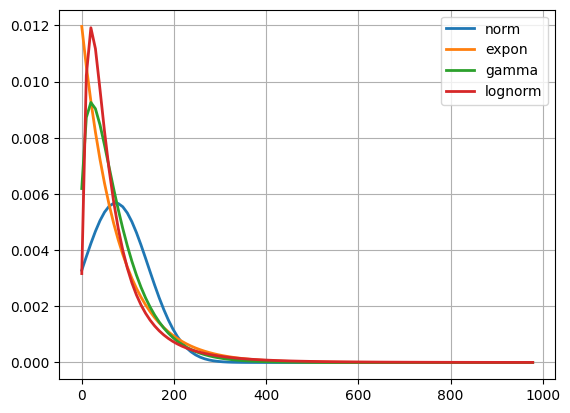

In [28]:

f.plot_pdf(names=['norm', 'expon', 'gamma', 'lognorm'])
plt.show()

#### No Tail Versions

In [29]:
hist_data_1_no_tail = [i for i in hist_data_1 if i > 5]
len(hist_data_1_no_tail)

31879

In [30]:
hist_data_2_no_tail = [i for i in hist_data_2 if i > 5]
len(hist_data_2_no_tail)

72211

In [31]:
hist_data_3_no_tail = [i for i in hist_data_3 if i > 5]
len(hist_data_3_no_tail)

63139

In [41]:
data = hist_data_1_no_tail


SSE - Sum of the squared errors between model prediction and actual data.

AIC (Akaike Information Criterion) - Favours more complex models to fit data better (Lower value is better)

BIC (Bayesian Information Criterion) - Favours less complex models to avoid overfitting. Penalty increases with more data (Lower value is better)

Kullback-Leibler Divergence - Measure of difference between 2 distributions. Basically, how much information you lose when you use one distribution to approximate another one. (Important note: It can be infinite if any single event occurs in one distribution, and does not in another distribution. Look formula for more info)

Kolmogorov-Smirnov Statistic - Measures the distance between observed data's CDF and CDF of fitted model. (Maximum vertical difference)

P-value (Associated with KS statistic) - Lower P value means significant deviation. (Note that the test is very sensitive to even minor deviations in the tails of the distribution. This increases with greater sample size)

Recheck p values !!!!


2024-06-04 14:54:26.752 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted expon distribution with error=0.0)


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
expon,2.831592e-07,2060.859407,2077.598812,inf,0.007583,0.050903


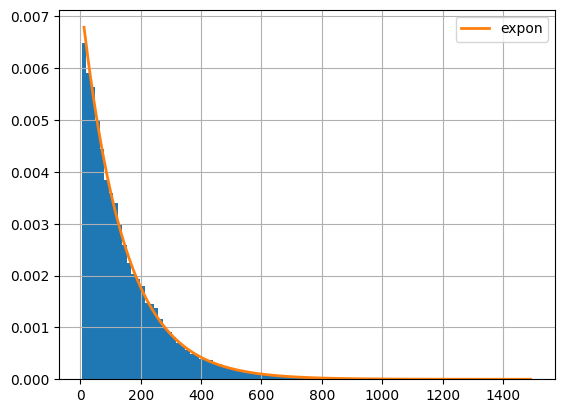

In [43]:

f = Fitter(data, distributions=['expon'])
f.fit()

# Print the summary of the best fit
f.summary()


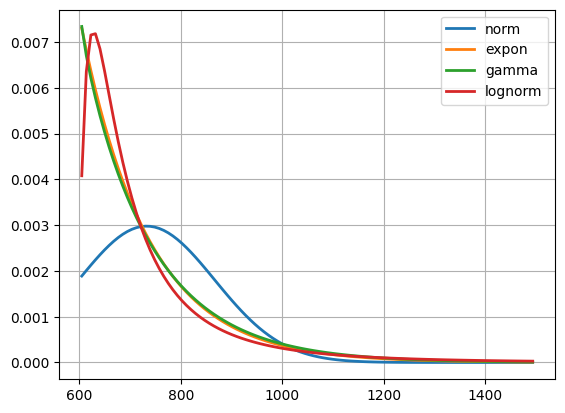

In [34]:
f.plot_pdf(names=['norm', 'expon', 'gamma', 'lognorm'])
plt.show()

In [35]:
data = hist_data_2_no_tail


2024-06-04 14:40:17.061 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted norm distribution with error=0.000305)
2024-06-04 14:40:17.369 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted expon distribution with error=4e-06)
2024-06-04 14:40:17.687 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted lognorm distribution with error=2.7e-05)
2024-06-04 14:40:21.803 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted gamma distribution with error=0.000594)


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
expon,0.000004,2050.713870,2069.088565,inf,0.013983,1.080791e-12
lognorm,0.000027,1799.463868,1827.025911,inf,0.034704,5.361808e-76
norm,0.000305,4992.240798,5010.615493,inf,0.154697,0.000000e+00
gamma,0.000594,2616.080281,2643.642324,inf,0.300865,0.000000e+00


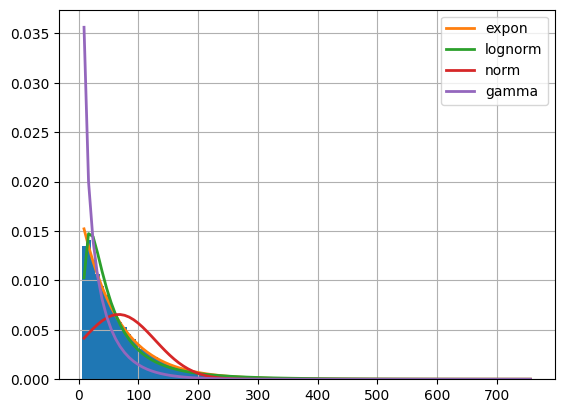

In [36]:

f = Fitter(data, distributions=['norm', 'expon', 'gamma', 'lognorm'])
f.fit()

# Print the summary of the best fit
f.summary()


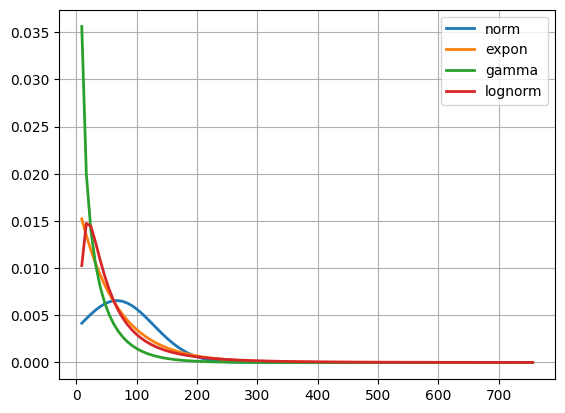

In [37]:
f.plot_pdf(names=['norm', 'expon', 'gamma', 'lognorm'])
plt.show()

In [38]:
data = hist_data_3_no_tail


2024-06-04 14:40:23.300 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted expon distribution with error=1e-06)
2024-06-04 14:40:23.316 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted norm distribution with error=0.000211)
2024-06-04 14:40:23.562 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted lognorm distribution with error=1.7e-05)
2024-06-04 14:40:25.091 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted gamma distribution with error=1e-06)


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
gamma,5.548751e-07,2282.631282,2309.790564,inf,0.009281,3.750332e-05
expon,1.375283e-06,2233.885225,2251.991412,inf,0.012780,2.185688e-09
lognorm,1.687939e-05,1895.778419,1922.937701,inf,0.034181,1.582875e-64
norm,2.111135e-04,6206.917610,6225.023798,inf,0.155759,0.000000e+00


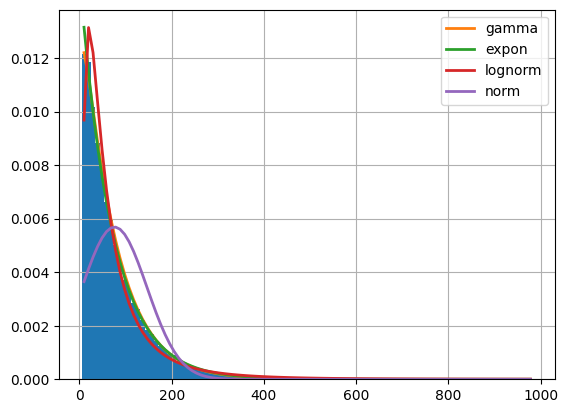

In [39]:

f = Fitter(data, distributions=['norm', 'expon', 'gamma', 'lognorm'])
f.fit()

# Print the summary of the best fit
f.summary()


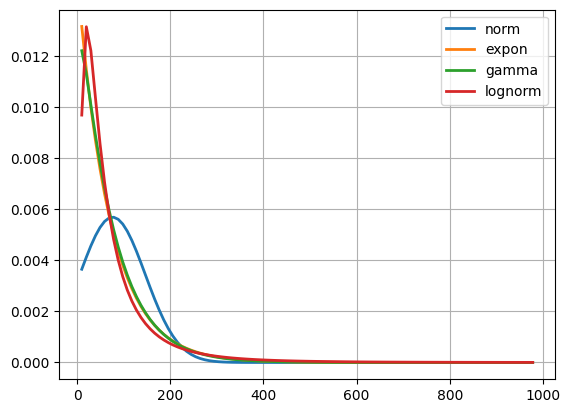

In [40]:
f.plot_pdf(names=['norm', 'expon', 'gamma', 'lognorm'])
plt.show()